In [ ]:
# Matplotlib 스타일 서식 종류
# 'ggplot' 외에도 많은 스타일 서식이 지원
# classic, bmh, dark_background, fast grayscale 등

In [5]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


C:\Users\mpm51\AppData\Local\Temp\ipykernel_19124\2485284111.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'], axis=1, inplace=True)
C:\Users\mpm51\AppData\Local\Temp\ipykernel_19124\2485284111.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)


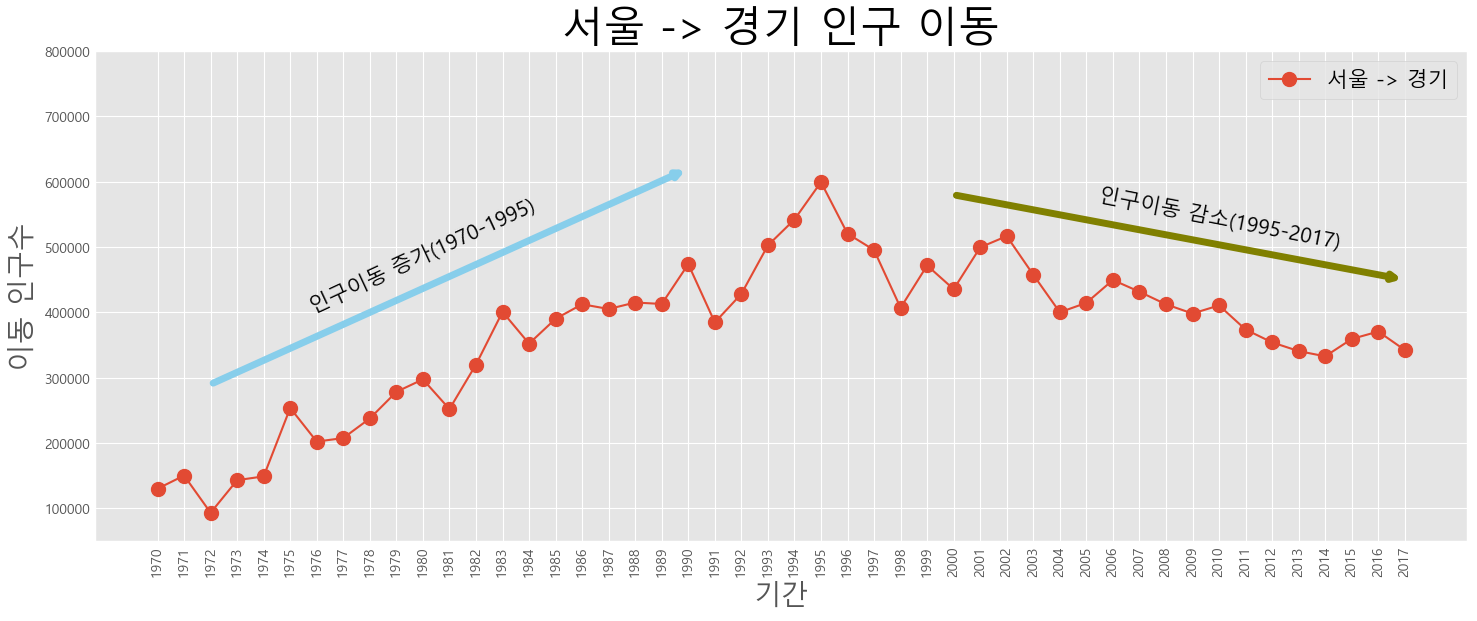

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(['전출지별'], axis=1, inplace=True)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데인터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정, ggplot은 스타일 이름
plt.style.use('ggplot')

# 그림 사이즈 늘리기
plt.figure(figsize = (14,5))

# x축 눈금 레이블 회전하기
plt.xticks(rotation = 'vertical')

# x, y축 데이터를 plot 함수에 입력 (마커 표시 추가)
plt.plot(sr_one.index, sr_one.values,
         marker = 'o',
         markersize = 10) # 마커 사이즈를 10 포인트로 설정하는 옵션

plt.title('서울 -> 경기 인구 이동', size = 30) # 차트 제목
plt.xlabel('기간', size = 20) # x축 이름
plt.ylabel('이동 인구수', size = 20) # y축 이름

# loc = 'best' best 옵션은 Matplotlib이 최적의 위치를 자동으로 선택함 , 다른 옵션들도 있음
# labels는 범례에 표시될 레이블 리스트를 설정한다.
plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15)

# y축 범위 지정(최솟값, 최댓값)
plt.ylim(50000,800000)

# 주석 표시 - 화살표 
plt.annotate('',
             xy = (20,620000), # 화살표의 머리 부분 (끝점)
             xytext = (2,290000), # 화살표의 꼬리 부분(시작점)
             xycoords = 'data', # 좌표 체계
             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5), # 화살표 서식
            )

plt.annotate('',
             xy = (47,450000), # 화살표의 머리 부분 (끝점)
             xytext = (30,580000), # 화살표의 꼬리 부분(시작점)
             xycoords = 'data', # 좌표 체계
             arrowprops = dict(arrowstyle = '->', color = 'olive', lw = 5), # 화살표 서식
            )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',
             xy = (10,400000), # 화살표의 머리 부분 (끝점)
             rotation = 25, # 텍스트 회전각도
             va = 'baseline', # 텍스트 상하 정렬
             ha = 'center', # 텍스트 좌우 정렬
             fontsize = 15, # 텍스트 크기
            )
             
plt.annotate('인구이동 감소(1995-2017)',
             xy = (40,500000), # 화살표의 머리 부분 (끝점)
             rotation = -11, # 텍스트 회전각도
             va = 'baseline', # 텍스트 상하 정렬
             ha = 'center', # 텍스트 좌우 정렬
             fontsize = 15, # 텍스트 크기
            )

plt.show()

In [25]:
# 우리나라 인구의 절반이 산다는 서울특별시와 경기도 간의 인구 이동 변화가 화살표 주석과 함께
# 선 그래프로 표시된다. 1990년대 중반까지 경기도권 5대 신도시(분당, 일산 등) 개발로 서울 인구의
# 대규모 경기도 유입이 있었음을 추정할 수 있다. 이 시기를 정점으로 서울을 벗어나
# 경기원으로 이동하는 인구는 현재까지 계속 감소하는 트렌드를 보이고 있다.